In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,confusion_matrix,f1_score,accuracy_score,roc_curve, roc_auc_score,ConfusionMatrixDisplay

In [216]:
pdf = pd.read_csv("weatherAUS.csv")

#details of the dataset
print(pdf.info())
print(pdf.describe())
print(pdf.head())
print(pdf.tail())
pdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [217]:
#drop unwanted date column
pdf=pdf.drop(['Date','WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)

In [218]:
#overall column
colu=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
#numerical column
col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
#non-numerical column
categorical_cols = ['RainToday', 'RainTomorrow']
#for encoder the the non-numeric
oo=['Location','RainToday', 'RainTomorrow']

In [219]:
#check the no of location finding....
co=[]
coo={}
unique_count1 = pdf['Location'].nunique()
print(f"Number of different location:{unique_count1}")
unique_count = pdf['Location'].unique()
for i in unique_count:
  co.append(pdf [pdf['Location'] == i].shape[0])
for i in range(len(unique_count)):
  coo[unique_count[i]]=co[i]
coo

Number of different location:49


{'Albury': 3040,
 'BadgerysCreek': 3009,
 'Cobar': 3009,
 'CoffsHarbour': 3009,
 'Moree': 3009,
 'Newcastle': 3039,
 'NorahHead': 3004,
 'NorfolkIsland': 3009,
 'Penrith': 3039,
 'Richmond': 3009,
 'Sydney': 3344,
 'SydneyAirport': 3009,
 'WaggaWagga': 3009,
 'Williamtown': 3009,
 'Wollongong': 3040,
 'Canberra': 3436,
 'Tuggeranong': 3039,
 'MountGinini': 3040,
 'Ballarat': 3040,
 'Bendigo': 3040,
 'Sale': 3009,
 'MelbourneAirport': 3009,
 'Melbourne': 3193,
 'Mildura': 3009,
 'Nhil': 1578,
 'Portland': 3009,
 'Watsonia': 3009,
 'Dartmoor': 3009,
 'Brisbane': 3193,
 'Cairns': 3040,
 'GoldCoast': 3040,
 'Townsville': 3040,
 'Adelaide': 3193,
 'MountGambier': 3040,
 'Nuriootpa': 3009,
 'Woomera': 3009,
 'Albany': 3040,
 'Witchcliffe': 3009,
 'PearceRAAF': 3009,
 'PerthAirport': 3009,
 'Perth': 3193,
 'SalmonGums': 3001,
 'Walpole': 3006,
 'Hobart': 3193,
 'Launceston': 3040,
 'AliceSprings': 3040,
 'Darwin': 3193,
 'Katherine': 1578,
 'Uluru': 1578}

In [220]:
#finding the dulipate rows in the dataset
duplicate_rows = pdf[pdf.duplicated()]
print("Total duplicate rows:", duplicate_rows.shape[0])
duplicate_rows

Total duplicate rows: 215


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
985,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5459,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127745,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127746,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127747,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127748,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
#drop the all duplicate row in the dataset
pdf = pdf.drop_duplicates()

In [222]:
#check again the any duplicate rows in the dataset
duplicate_rows = pdf [pdf.duplicated()]
print("Total duplicate rows:", duplicate_rows.shape[0])
duplicate_rows

Total duplicate rows: 0


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


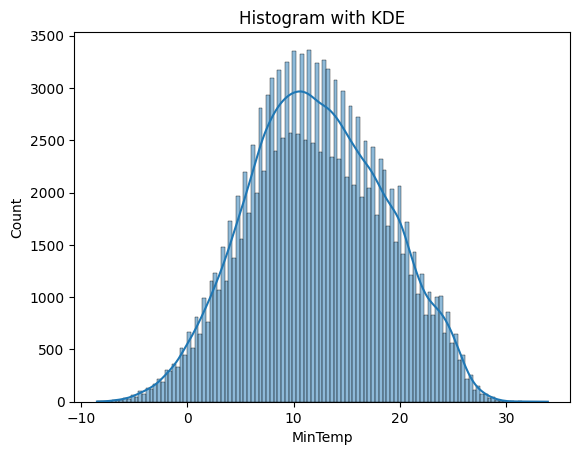

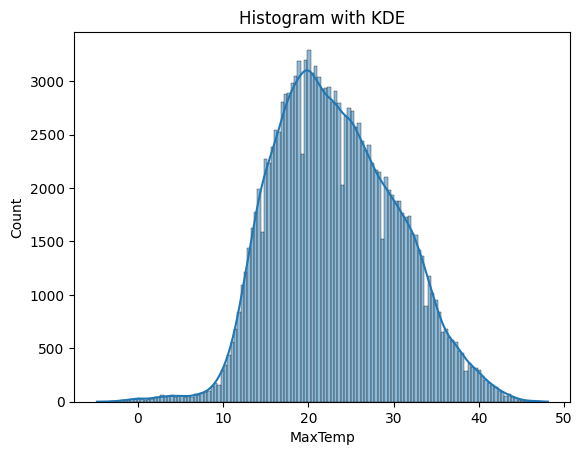

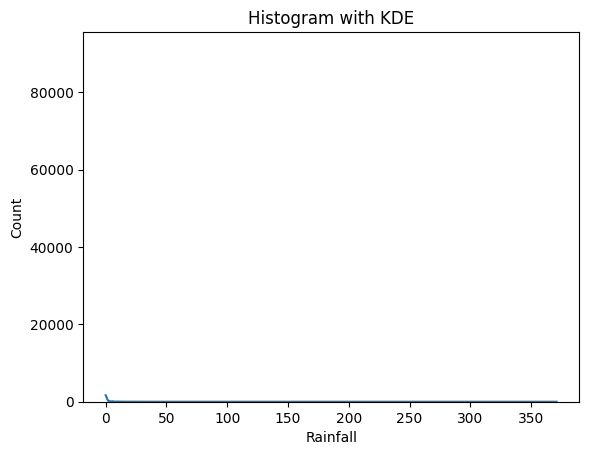

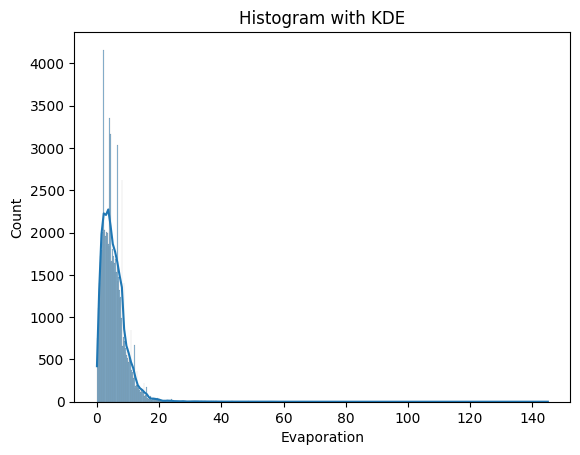

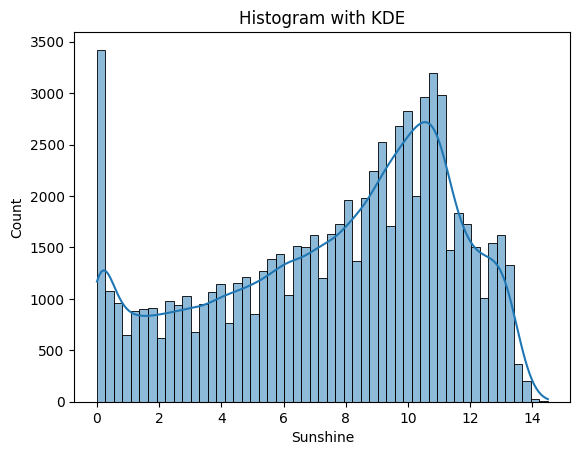

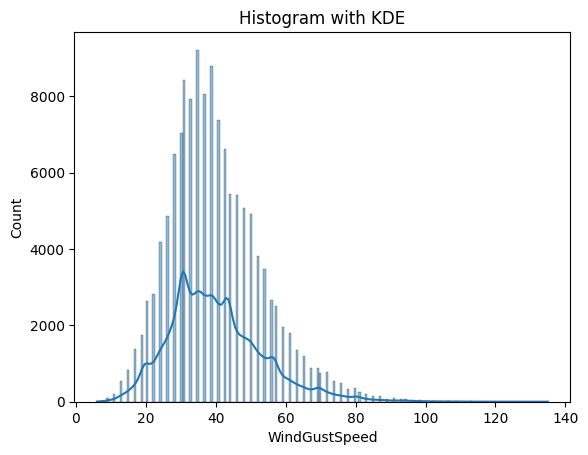

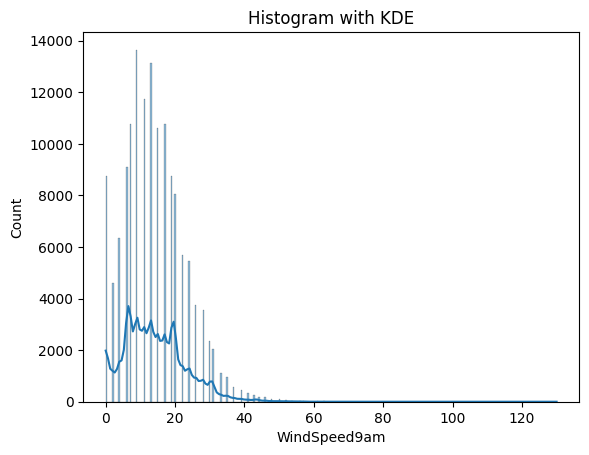

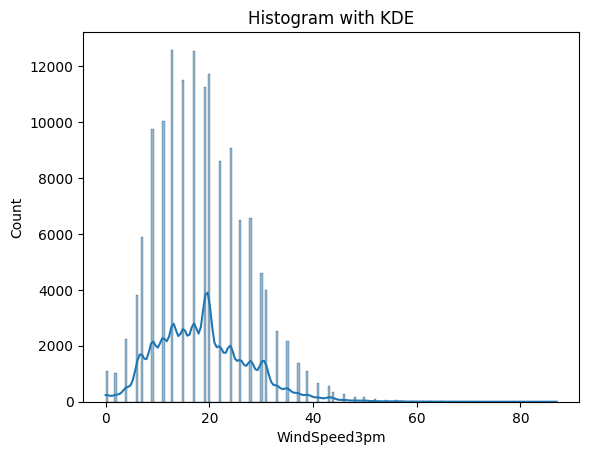

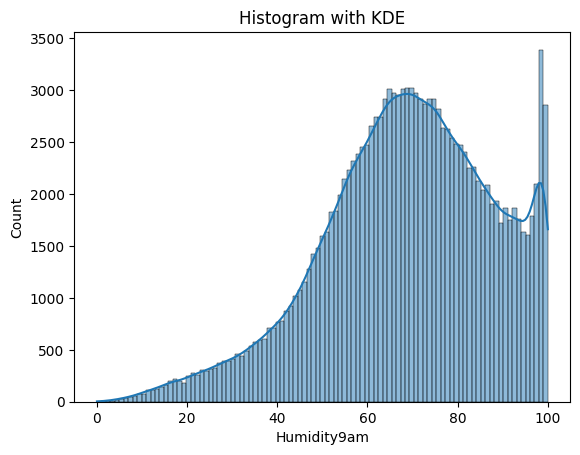

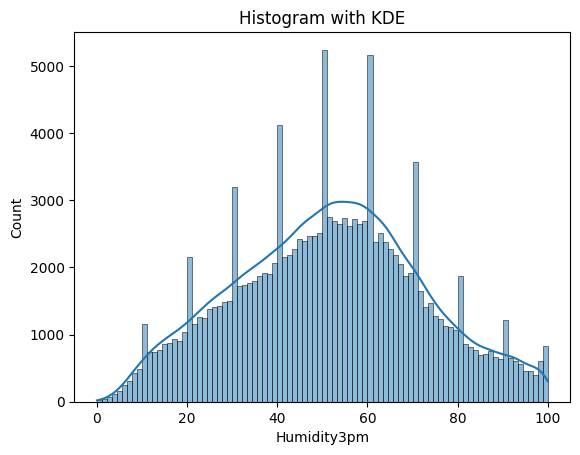

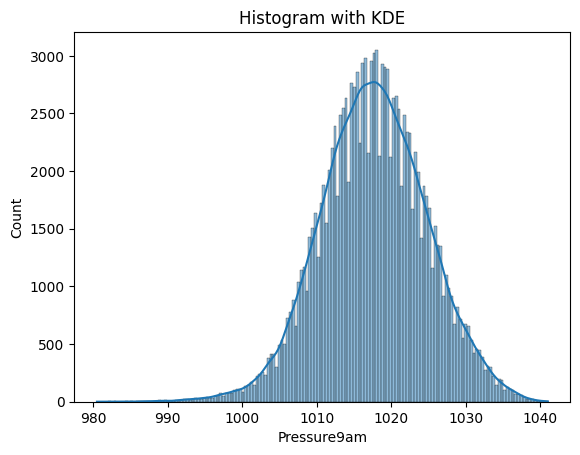

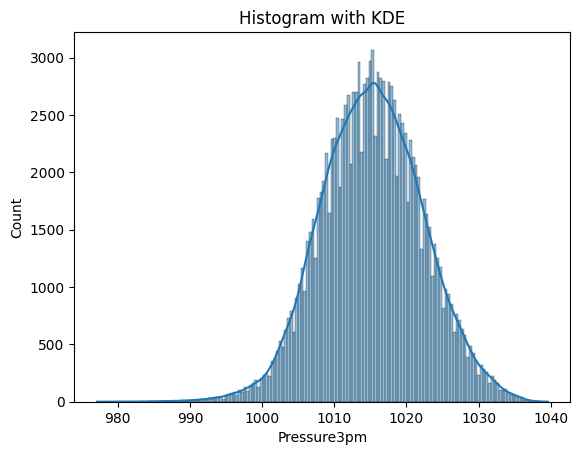

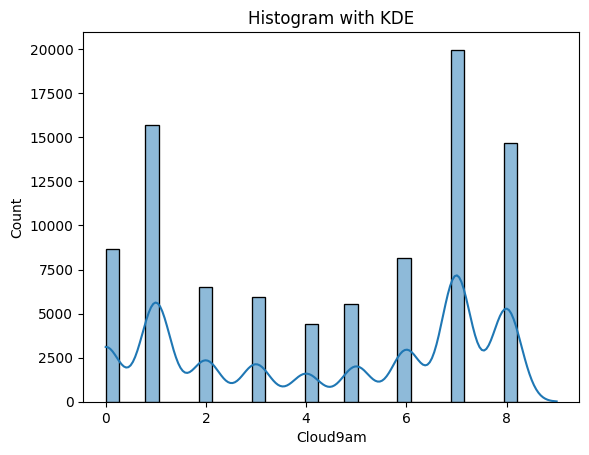

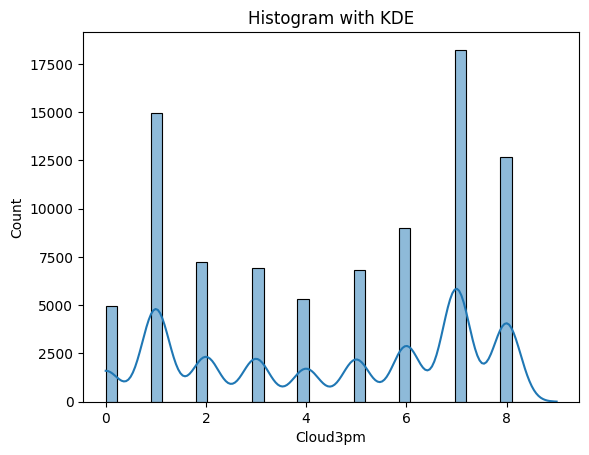

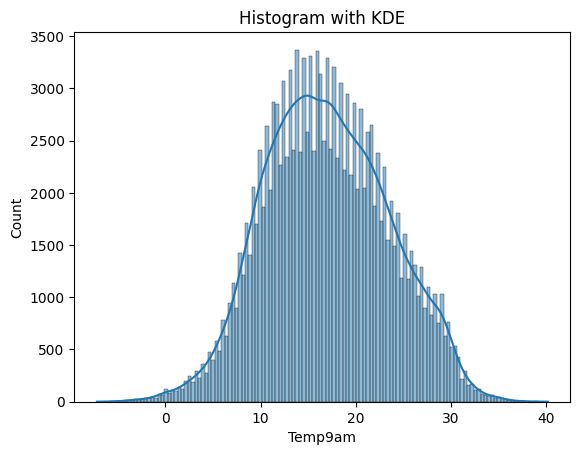

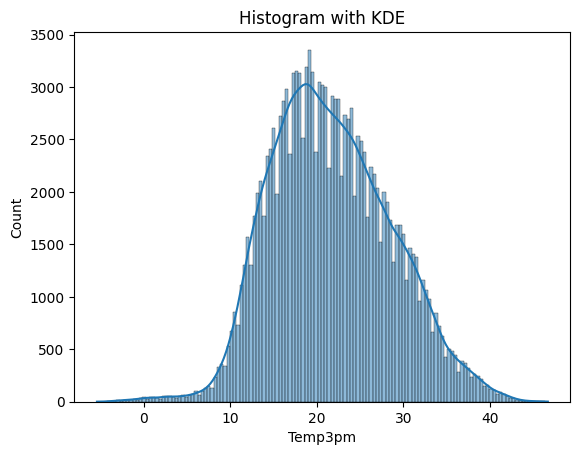

In [223]:
for i in col:
  sns.histplot(pdf[i], kde=True)
  plt.title("Histogram with KDE")
  plt.show()

In [224]:
#filling the missing values by the mean and mode
for cot in categorical_cols:
    pdf.loc[:, cot] = pdf[cot].fillna(pdf[cot].mode()[0])
    pdf.loc[:, col] = pdf[col].fillna(pdf[col].mean())

In [225]:
"""{'Albury': 3040,'BadgerysCreek': 3009, 'Cobar': 3009, 'CoffsHarbour': 3009, 'Moree': 3009, 'Newcastle': 3039, 'NorahHead': 3004,
'NorfolkIsland': 3009, 'Penrith': 3039, 'Richmond': 3009, 'Sydney': 3344,'SydneyAirport': 3009, 'WaggaWagga': 3009, 'Williamtown': 3009,
 'Wollongong': 3040, 'Canberra': 3436,'Tuggeranong': 3039,'MountGinini': 3040, 'Ballarat': 3040, 'Bendigo': 3040, 'Sale': 3009,
 'MelbourneAirport': 3009, 'Melbourne': 3193, 'Mildura': 3009, 'Nhil': 1578, 'Portland': 3009, 'Watsonia': 3009, 'Dartmoor': 3009,
  'Brisbane': 3193, 'Cairns': 3040, 'GoldCoast': 3040, 'Townsville': 3040, 'Adelaide': 3193, 'MountGambier': 3040, 'Nuriootpa': 3009,
  'Woomera': 3009, 'Albany': 3040, 'Witchcliffe': 3009, 'PearceRAAF': 3009, 'PerthAirport': 3009, 'Perth': 3193, 'SalmonGums': 3001,
   'Walpole': 3006, 'Hobart': 3193, 'Launceston': 3040, 'AliceSprings': 3040,'Darwin': 3193,'Katherine': 1578,'Uluru': 1578}"""

"{'Albury': 3040,'BadgerysCreek': 3009, 'Cobar': 3009, 'CoffsHarbour': 3009, 'Moree': 3009, 'Newcastle': 3039, 'NorahHead': 3004, \n'NorfolkIsland': 3009, 'Penrith': 3039, 'Richmond': 3009, 'Sydney': 3344,'SydneyAirport': 3009, 'WaggaWagga': 3009, 'Williamtown': 3009,\n 'Wollongong': 3040, 'Canberra': 3436,'Tuggeranong': 3039,'MountGinini': 3040, 'Ballarat': 3040, 'Bendigo': 3040, 'Sale': 3009,\n 'MelbourneAirport': 3009, 'Melbourne': 3193, 'Mildura': 3009, 'Nhil': 1578, 'Portland': 3009, 'Watsonia': 3009, 'Dartmoor': 3009,\n  'Brisbane': 3193, 'Cairns': 3040, 'GoldCoast': 3040, 'Townsville': 3040, 'Adelaide': 3193, 'MountGambier': 3040, 'Nuriootpa': 3009, \n  'Woomera': 3009, 'Albany': 3040, 'Witchcliffe': 3009, 'PearceRAAF': 3009, 'PerthAirport': 3009, 'Perth': 3193, 'SalmonGums': 3001,\n   'Walpole': 3006, 'Hobart': 3193, 'Launceston': 3040, 'AliceSprings': 3040,'Darwin': 3193,'Katherine': 1578,'Uluru': 1578}"

MinTemp


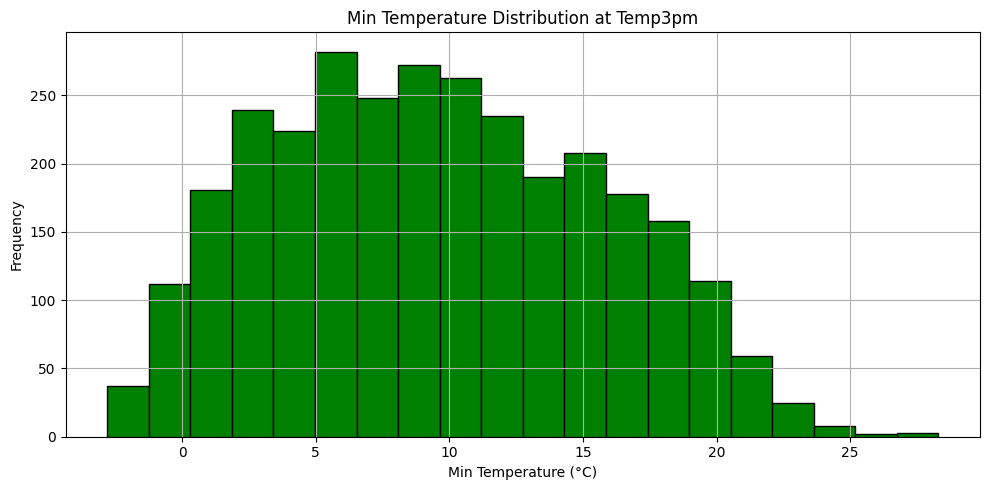

MaxTemp


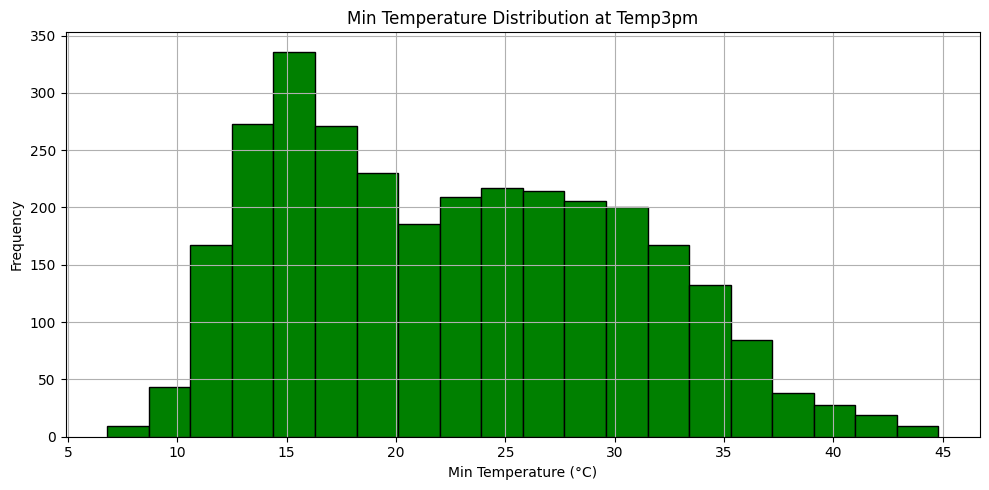

Rainfall


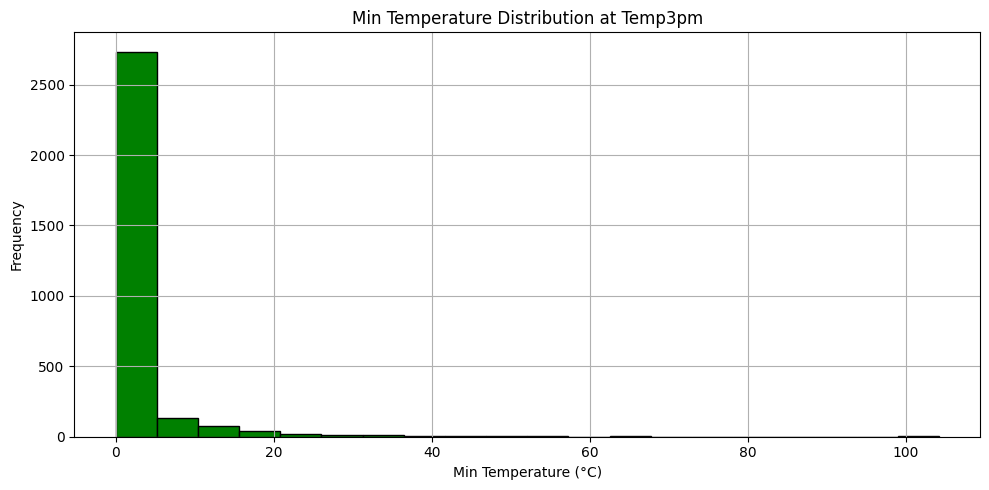

Evaporation


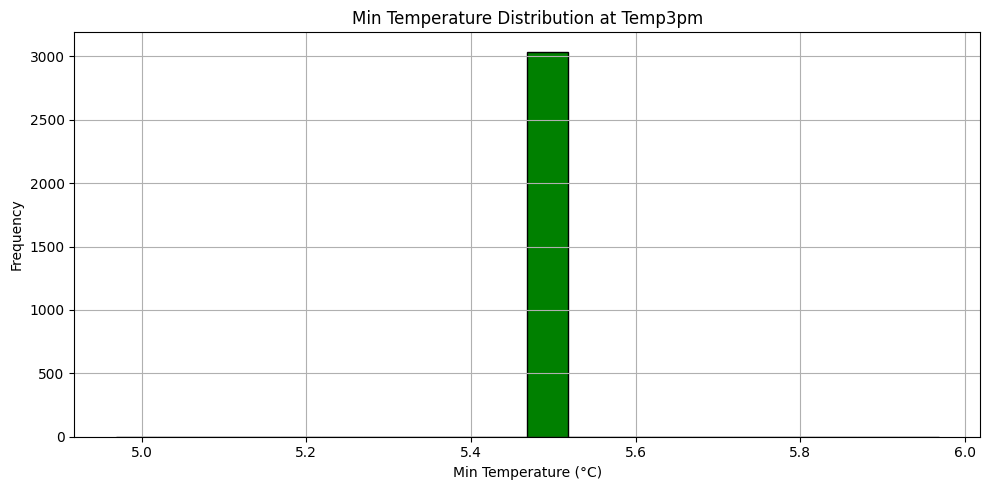

Sunshine


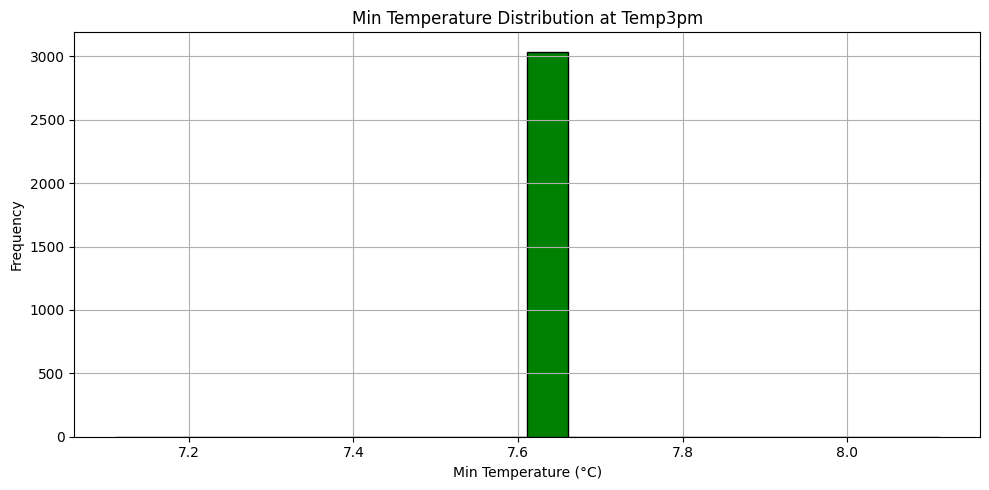

WindGustSpeed


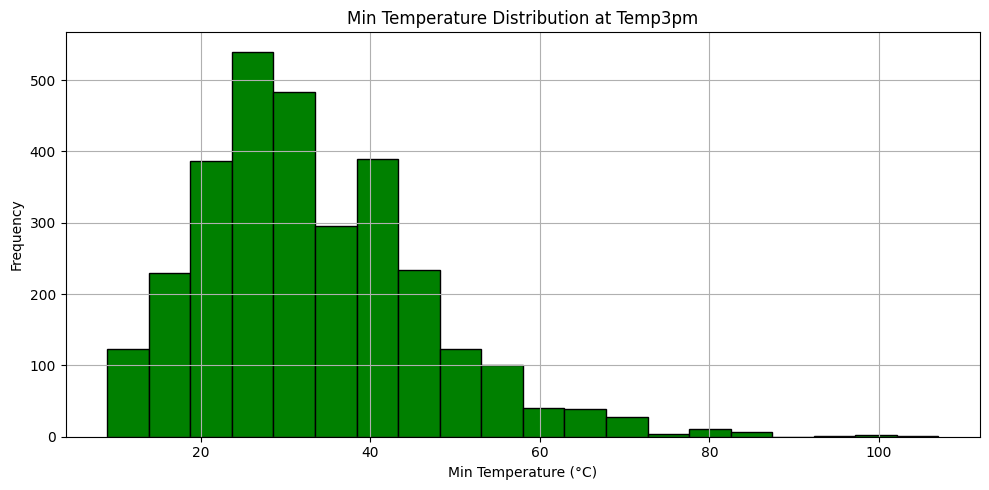

WindSpeed9am


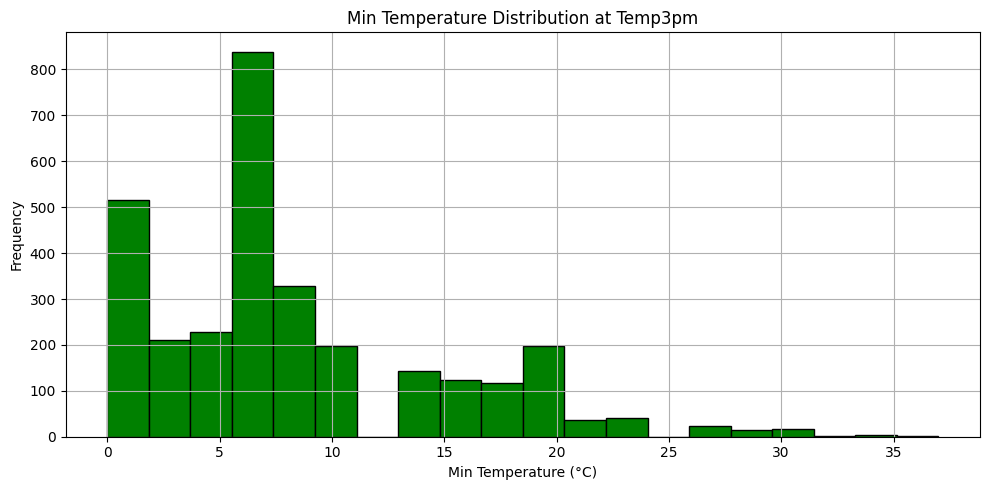

WindSpeed3pm


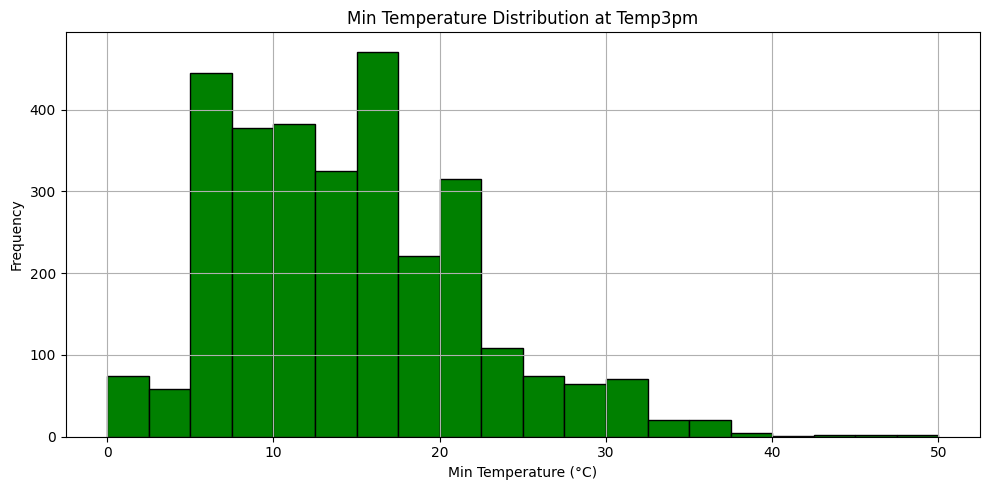

Humidity9am


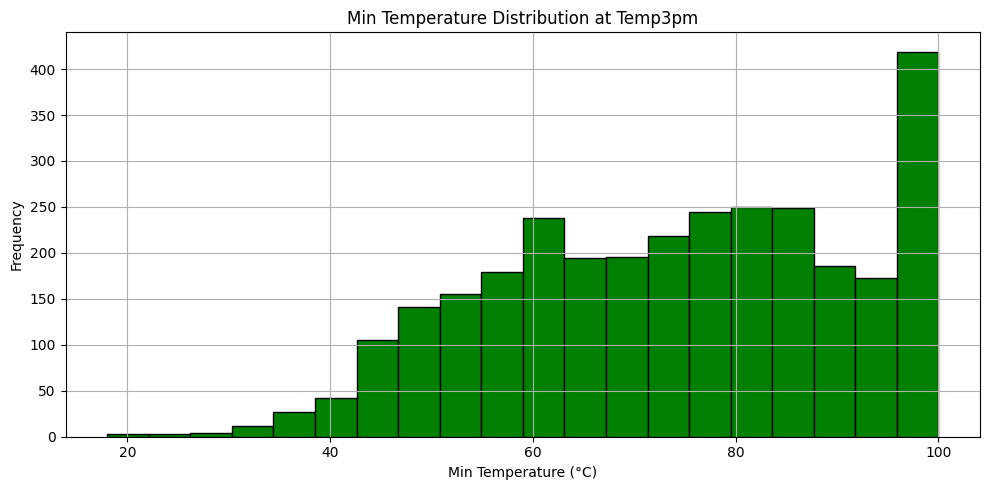

Humidity3pm


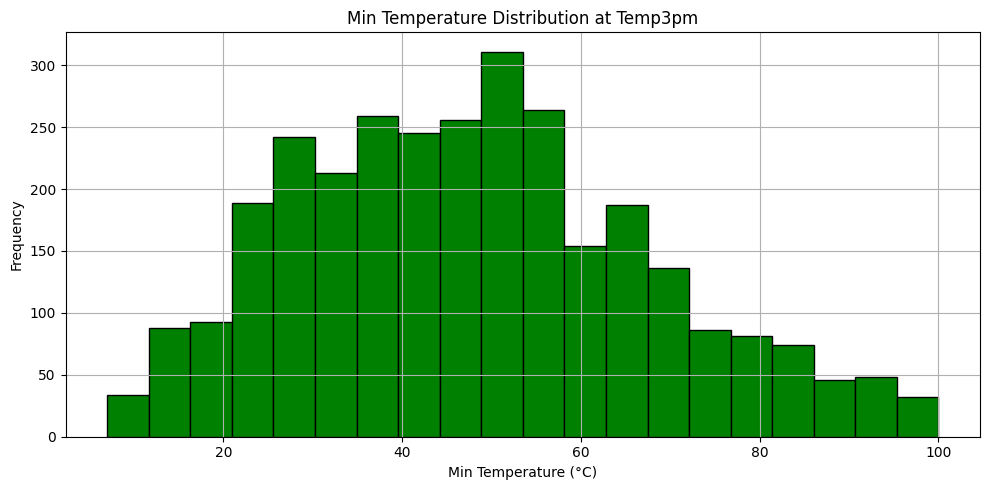

Pressure9am


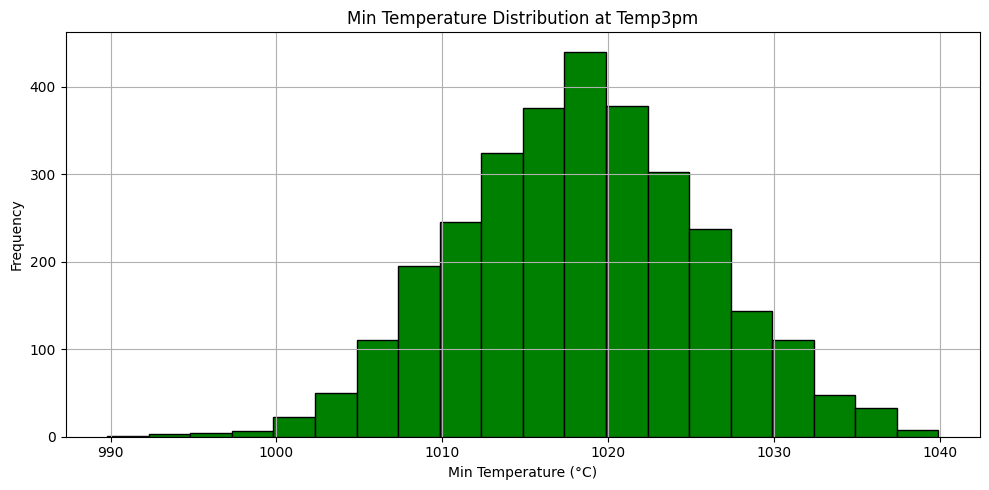

Pressure3pm


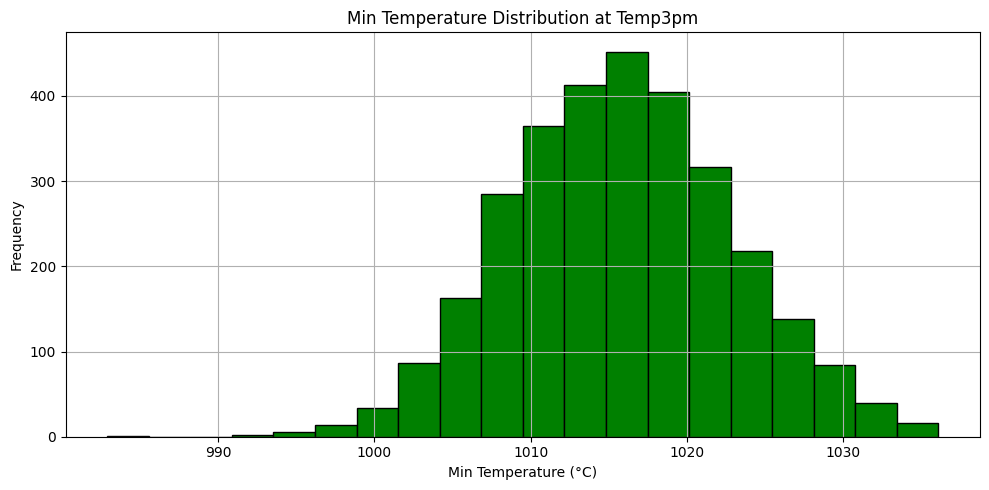

Cloud9am


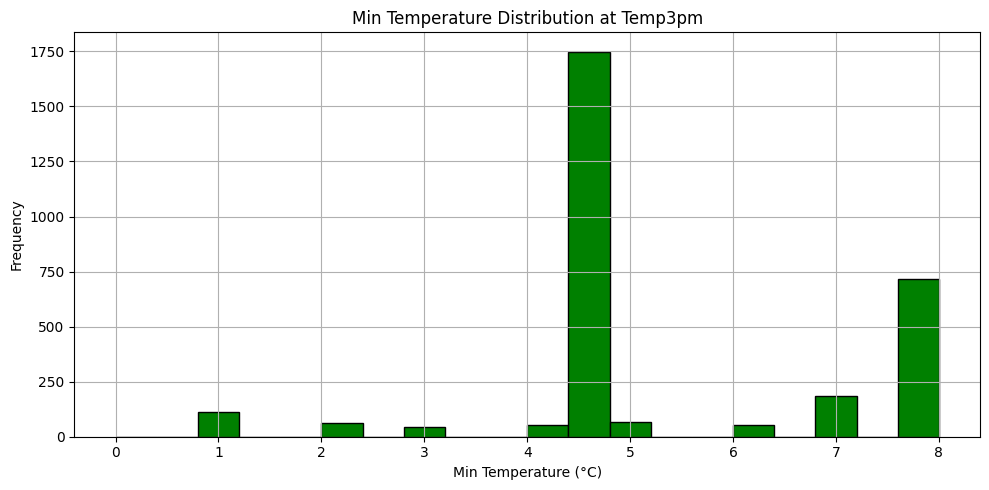

Cloud3pm


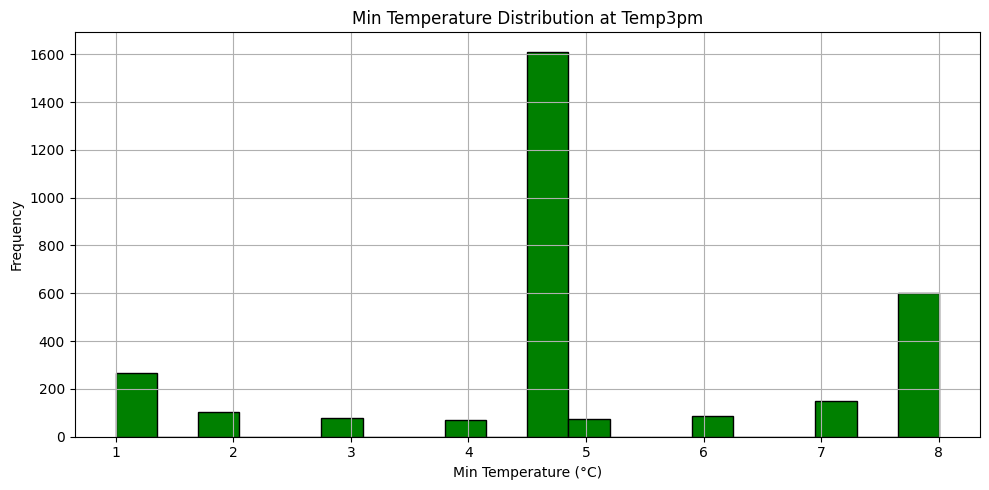

Temp9am


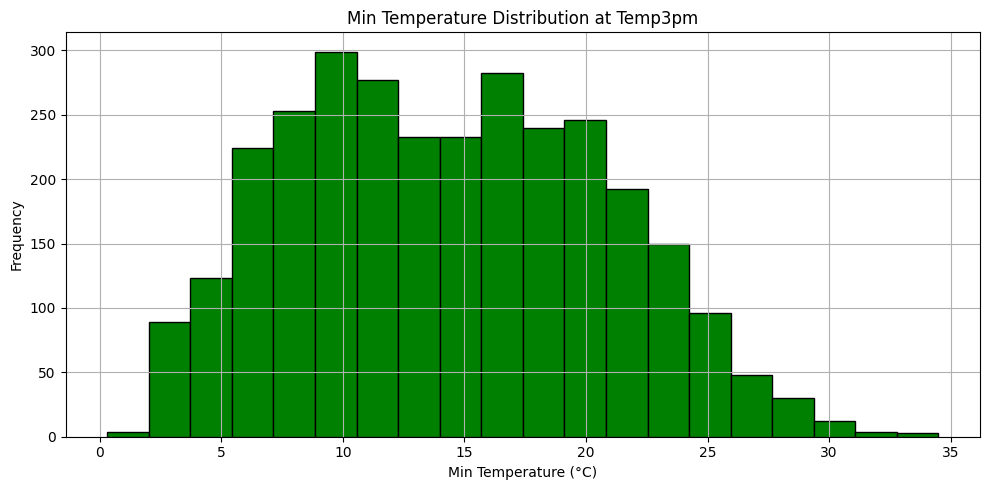

Temp3pm


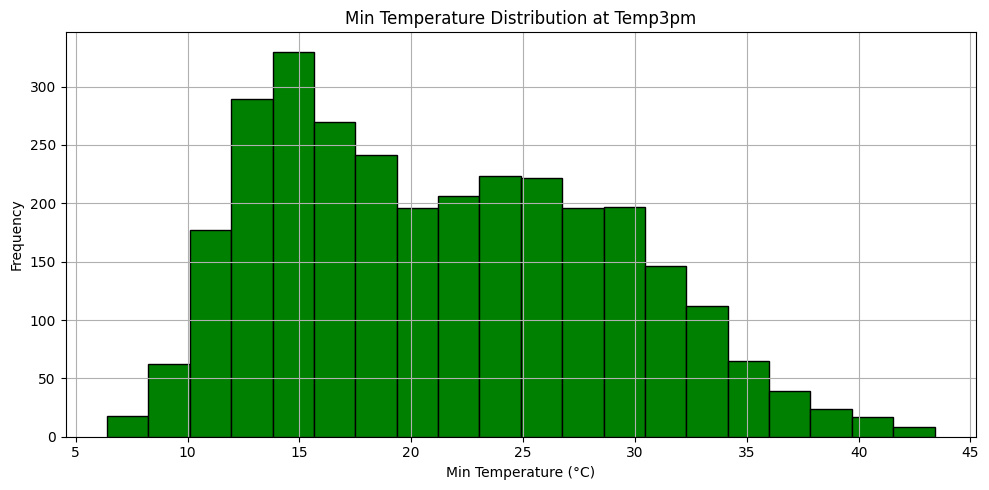

RainToday


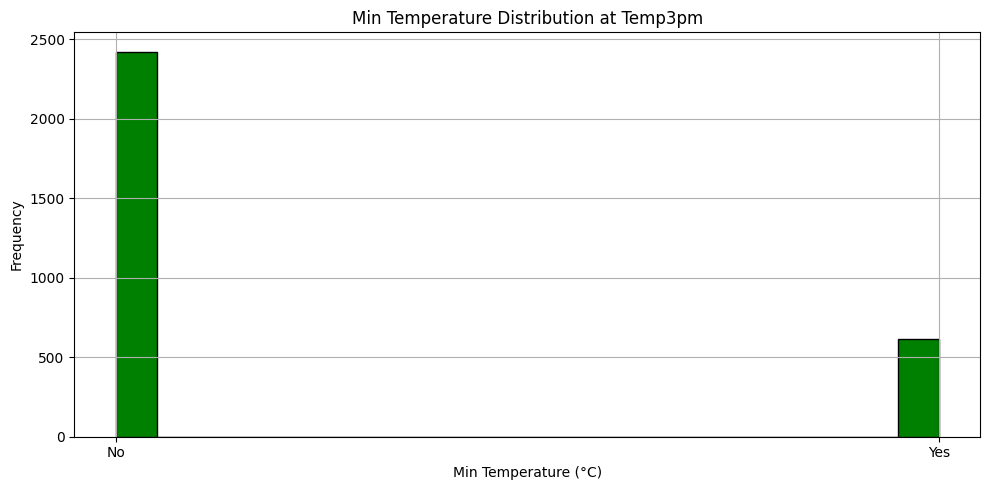

RainTomorrow


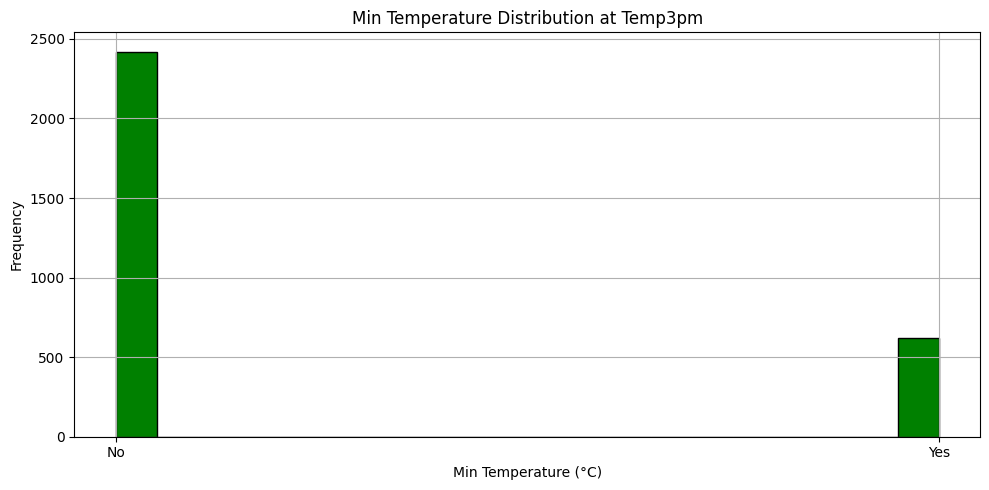

In [214]:
#visualize the overall data based on the different locations
for j in colu:
      print(j)
      filtered = pdf[pdf["Location"] == "Albury"]
      min_temps = filtered[j]
      plt.figure(figsize=(10, 5))
      plt.hist(min_temps, bins=20, color='green', edgecolor='black')
      plt.title(f"Min Temperature Distribution at {i}")
      plt.xlabel("Min Temperature (°C)")
      plt.ylabel("Frequency")
      plt.grid(True)
      plt.tight_layout()
      plt.show()

In [226]:
#encode the non numerical columns
le=LabelEncoder()
for c in oo:
    pdf[c] = le.fit_transform(pdf[c])

In [227]:
#datatype convertion of the column into similiar datatype
for i in colu:
  pdf[i] = pdf[i].astype(int)

In [228]:
#removing the outliers in the overall dataset
for k in colu:

  percentile25 = pdf[k].quantile(0.25)
  percentile75 = pdf[k].quantile(0.75)

  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  print("Upper limit", upper_limit)
  print("Lower limit", lower_limit)

  pdf[pdf[k] < upper_limit]


Upper limit 29.5
Lower limit -6.5
Upper limit 43.0
Lower limit 3.0
Upper limit 2.5
Lower limit -1.5
Upper limit 6.5
Lower limit 2.5
Upper limit 9.5
Lower limit 5.5
Upper limit 68.5
Lower limit 8.5
Upper limit 37.0
Lower limit -11.0
Upper limit 40.5
Lower limit -3.5
Upper limit 122.0
Lower limit 18.0
Upper limit 107.0
Lower limit -5.0
Upper limit 1033.0
Lower limit 1001.0
Upper limit 1031.0
Lower limit 999.0
Upper limit 10.5
Lower limit -1.5
Upper limit 9.0
Lower limit 1.0
Upper limit 34.5
Lower limit -1.5
Upper limit 41.0
Lower limit 1.0
Upper limit 0.0
Lower limit 0.0
Upper limit 0.0
Lower limit 0.0


In [229]:
#details of the dataset
print(pdf.info())
print(pdf.describe())
print(pdf.head())
print(pdf.tail())
pdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 145245 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Location       145245 non-null  int64
 1   MinTemp        145245 non-null  int64
 2   MaxTemp        145245 non-null  int64
 3   Rainfall       145245 non-null  int64
 4   Evaporation    145245 non-null  int64
 5   Sunshine       145245 non-null  int64
 6   WindGustSpeed  145245 non-null  int64
 7   WindSpeed9am   145245 non-null  int64
 8   WindSpeed3pm   145245 non-null  int64
 9   Humidity9am    145245 non-null  int64
 10  Humidity3pm    145245 non-null  int64
 11  Pressure9am    145245 non-null  int64
 12  Pressure3pm    145245 non-null  int64
 13  Cloud9am       145245 non-null  int64
 14  Cloud3pm       145245 non-null  int64
 15  Temp9am        145245 non-null  int64
 16  Temp3pm        145245 non-null  int64
 17  RainToday      145245 non-null  int64
 18  RainTomorrow   145245 non-nul

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [230]:
X = pdf.drop('RainTomorrow', axis=1)
y = pdf['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [231]:
#randomforest model for features selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [232]:
#DecisionTress model for feature selection
clf = DecisionTreeClassifier(max_depth=16, random_state=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=8)

In [233]:
importances = model.feature_importances_

feature_names = X_train.columns
feature_scores = pd.DataFrame({'Feature': feature_names,'Importance Score': importances})
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

print("randam tree feature importances score")
print(feature_scores)

randam tree feature importances score
          Feature  Importance Score
10    Humidity3pm          0.191508
9     Humidity9am          0.072290
6   WindGustSpeed          0.071292
12    Pressure3pm          0.060888
11    Pressure9am          0.053970
8    WindSpeed3pm          0.050139
0        Location          0.048920
1         MinTemp          0.047466
7    WindSpeed9am          0.047240
5        Sunshine          0.047195
16        Temp3pm          0.045240
2         MaxTemp          0.045217
3        Rainfall          0.043995
15        Temp9am          0.043573
14       Cloud3pm          0.041446
17      RainToday          0.035558
13       Cloud9am          0.027511
4     Evaporation          0.026554


In [234]:
importances = clf.feature_importances_

feature_names = X_train.columns
feature_scores = pd.DataFrame({'Feature': feature_names,'Importance Score': importances})
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

print("decision tree feature importances score")
print(feature_scores)

decision tree feature importances score
          Feature  Importance Score
10    Humidity3pm          0.368379
6   WindGustSpeed          0.093788
12    Pressure3pm          0.062491
9     Humidity9am          0.050308
0        Location          0.043591
5        Sunshine          0.041536
8    WindSpeed3pm          0.038545
7    WindSpeed9am          0.036597
1         MinTemp          0.036572
11    Pressure9am          0.033800
3        Rainfall          0.033283
2         MaxTemp          0.030221
16        Temp3pm          0.028925
15        Temp9am          0.025451
14       Cloud3pm          0.024541
4     Evaporation          0.021291
13       Cloud9am          0.017230
17      RainToday          0.013451


In [235]:
pdf=pdf.drop(['RainToday', 'Cloud9am', 'Evaporation','Cloud3pm'],axis=1)

X = pdf.drop('RainTomorrow', axis=1)
y = pdf['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [236]:
#randomforest model
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [237]:
y_pred_rf = rfmodel.predict(X_test)

In [238]:
#report metrices of the randomforest

recall_rf=recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf=f1_score(y_test, y_pred_rf)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
auc_rf= roc_auc_score(y_test, y_pred_rf)


In [239]:
print("confusion matrix of the rf:", cm_rf)
print(f"recall value of the rf:{recall_rf}")
print(f"f1_score value of the rf:{f1_rf}")
print(f"accuracy value of the rf:{accuracy_rf}")
print("AUC Score of the rf:", auc_rf)

confusion matrix of the rf: [[21653  1036]
 [ 3242  3118]]
recall value of the rf:0.490251572327044
f1_score value of the rf:0.593113943313677
accuracy value of the rf:0.8527315914489311
AUC Score of the rf: 0.7222953396916634


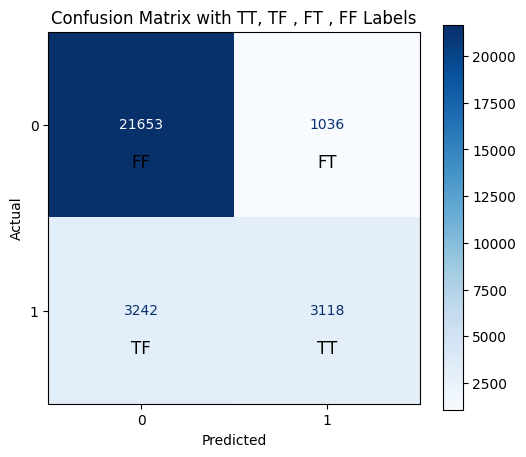

In [240]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 5))

disp.plot(ax=ax, cmap="Blues")
labels = [["FF", "FT"], ["TF", "TT"]]

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j, i + 0.2, labels[i][j], ha='center', va='center', fontsize=12, color='black')

plt.title("Confusion Matrix with TT, TF , FT , FF Labels")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

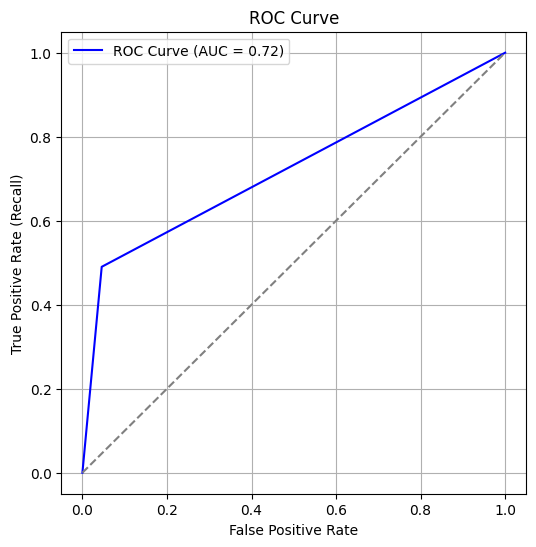

In [241]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [242]:
gbmodel = GradientBoostingClassifier(n_estimators=100)
gbmodel.fit(X_train, y_train)

GradientBoostingClassifier()

In [243]:
y_predgb = gbmodel.predict(X_test)

In [244]:
#report metrices of the gradient boosting

recall_gb=recall_score(y_test, y_predgb)
cm_gb = confusion_matrix(y_test, y_predgb)
f1_gb=f1_score(y_test, y_predgb)
accuracy_gb=accuracy_score(y_test, y_predgb)
auc_gb= roc_auc_score(y_test, y_predgb)


In [245]:
print("confusion matrix of the rf:", cm_gb)
print(f"recall value of the rf:{recall_gb}")
print(f"f1_score value of the rf:{f1_gb}")
print(f"accuracy value of the rf:{accuracy_gb}")
print("AUC Score of the rf:", auc_gb)

confusion matrix of the rf: [[21622  1067]
 [ 3358  3002]]
recall value of the rf:0.4720125786163522
f1_score value of the rf:0.5757023683958193
accuracy value of the rf:0.8476711762883404
AUC Score of the rf: 0.7124926924110012


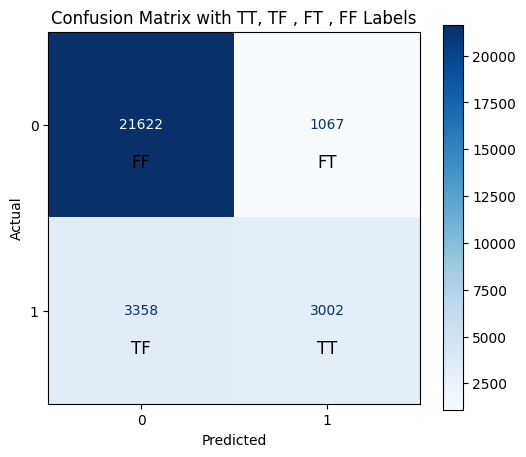

In [246]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues")
labels = [["FF", "FT"], ["TF", "TT"]]
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        ax.text(j, i + 0.2, labels[i][j], ha='center', va='center', fontsize=12, color='black')
plt.title("Confusion Matrix with TT, TF , FT , FF Labels")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

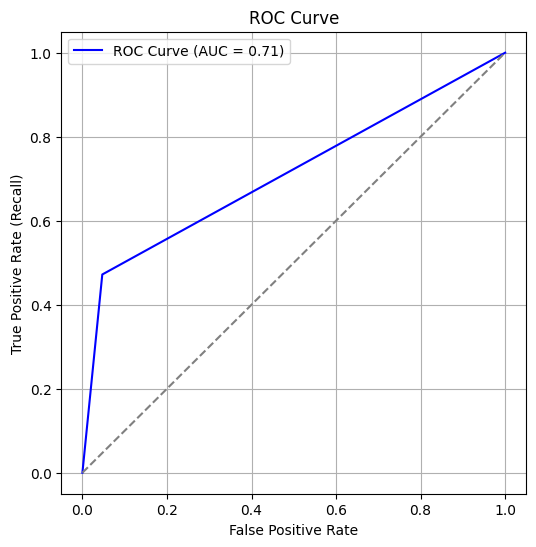

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, y_predgb)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_gb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [248]:
NBmodel= GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [249]:
y_predNB = NBmodel.predict(X_test)

In [250]:
#report metrices of the NB

recall_nb=recall_score(y_test, y_predNB)
cm_nb = confusion_matrix(y_test, y_predNB)
f1_nb=f1_score(y_test, y_predNB)
accuracy_nb=accuracy_score(y_test, y_predNB)
auc_nb= roc_auc_score(y_test, y_predNB)


In [251]:
print("confusion matrix of the rf:", cm_nb)
print(f"recall value of the rf:{recall_nb}")
print(f"f1_score value of the rf:{f1_nb}")
print(f"accuracy value of the rf:{accuracy_nb}")
print("AUC Score of the rf:", auc_nb)


confusion matrix of the rf: [[20635  2054]
 [ 3190  3170]]
recall value of the rf:0.49842767295597484
f1_score value of the rf:0.5473066298342542
accuracy value of the rf:0.8194774346793349
AUC Score of the rf: 0.7039496115231636


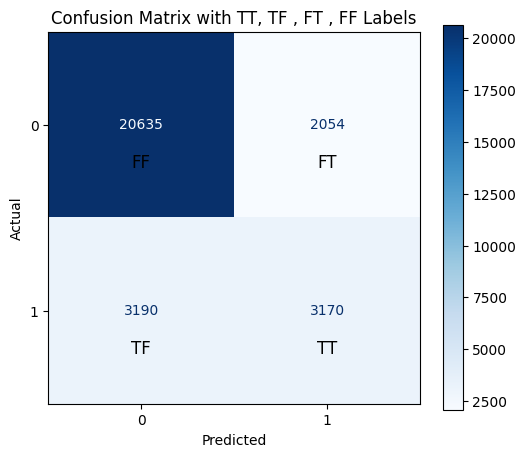

In [252]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 5))

disp.plot(ax=ax, cmap="Blues")
labels = [["FF", "FT"], ["TF", "TT"]]
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(j, i + 0.2, labels[i][j], ha='center', va='center', fontsize=12, color='black')

plt.title("Confusion Matrix with TT, TF , FT , FF Labels")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


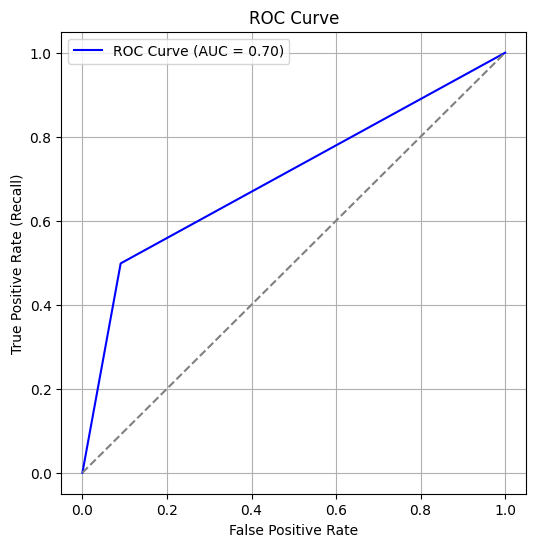

In [253]:
fpr, tpr, thresholds = roc_curve(y_test,y_predNB)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_nb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [254]:
KNNmodel = KNeighborsClassifier(n_neighbors = 5)
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [255]:
y_predKNN = KNNmodel.predict(X_test)

In [256]:
#report metrices of the KNN

recall_KNN=recall_score(y_test, y_predKNN)
cm_KNN = confusion_matrix(y_test, y_predKNN)
f1_KNN=f1_score(y_test, y_predKNN)
accuracy_KNN=accuracy_score(y_test, y_predKNN)
auc_KNN= roc_auc_score(y_test, y_predKNN)


In [257]:

print("confusion matrix of the rf:", cm_KNN)
print(f"recall value of the rf:{recall_KNN}")
print(f"f1_score value of the rf:{f1_KNN}")
print(f"accuracy value of the rf:{accuracy_KNN}")
print("AUC Score of the rf:", auc_KNN)


confusion matrix of the rf: [[21191  1498]
 [ 3322  3038]]
recall value of the rf:0.4776729559748428
f1_score value of the rf:0.5576358296622613
accuracy value of the rf:0.8340734620813108
AUC Score of the rf: 0.7058248864673015


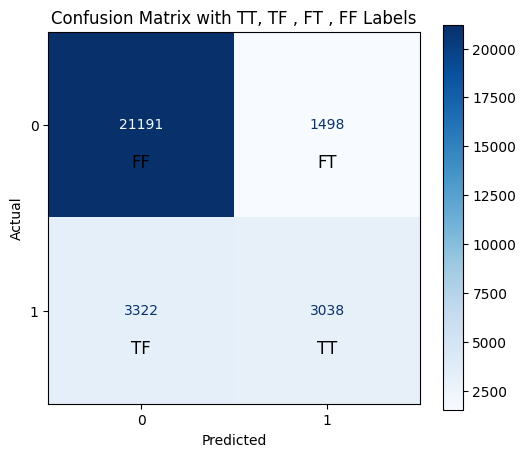

In [258]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 5))

disp.plot(ax=ax, cmap="Blues")
labels = [["FF", "FT"], ["TF", "TT"]]
for i in range(cm_KNN.shape[0]):
    for j in range(cm_KNN.shape[1]):
        ax.text(j, i + 0.2, labels[i][j], ha='center', va='center', fontsize=12, color='black')

plt.title("Confusion Matrix with TT, TF , FT , FF Labels")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

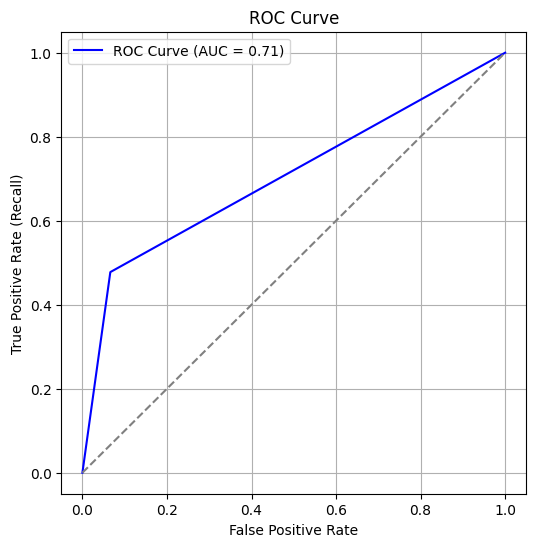

In [259]:

fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_KNN:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [260]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [261]:
y_predKLG =   LRmodel.predict(X_test)

In [262]:
#report metrices of the LR

recall_LR=recall_score(y_test, y_predKLG)
cm_LR = confusion_matrix(y_test, y_predKLG)
f1_LR=f1_score(y_test, y_predKLG)
accuracy_LR=accuracy_score(y_test,y_predKLG)
auc_LR= roc_auc_score(y_test, y_predKLG)


In [263]:

print("confusion matrix of the rf:", cm_LR)
print(f"recall value of the rf:{recall_LR}")
print(f"f1_score value of the rf:{f1_LR}")
print(f"accuracy value of the rf:{accuracy_LR}")
print("AUC Score of the rf:", auc_LR)


confusion matrix of the rf: [[21544  1145]
 [ 3549  2811]]
recall value of the rf:0.4419811320754717
f1_score value of the rf:0.5449786739046142
accuracy value of the rf:0.8384109607903887
AUC Score of the rf: 0.6957580745220233


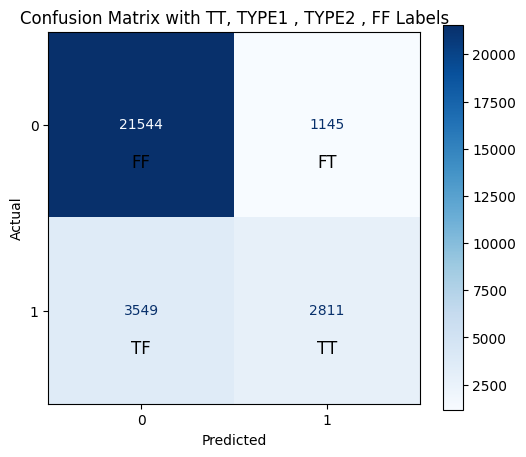

In [264]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues")
labels = [["FF", "FT"], ["TF", "TT"]]
for i in range(cm_LR.shape[0]):
    for j in range(cm_LR.shape[1]):
        ax.text(j, i + 0.2, labels[i][j], ha='center', va='center', fontsize=12, color='black')
plt.title("Confusion Matrix with TT, TYPE1 , TYPE2 , FF Labels")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

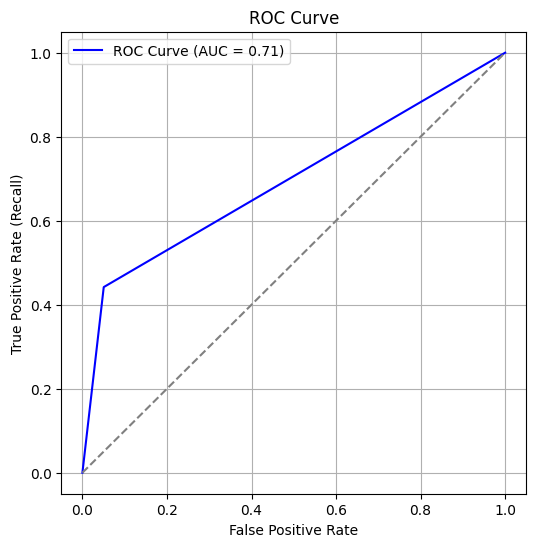

In [265]:

fpr, tpr, thresholds = roc_curve(y_test, y_predKLG)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()